In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('data/measurements.csv')

In [45]:
df_2 = pd.read_excel('data/measurements2.xlsx')

## Initial data exploration

In [50]:
df.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [48]:
df_2.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [46]:
df.shape, df_2.shape

((388, 11), (388, 12))

 - df and df_2 are the same data sets - so only df will be used in the following

In [5]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [7]:
for col in df:
    print(col, df[col].nunique(dropna=False))

distance 174
consume 43
speed 60
temp_inside 14
temp_outside 33
specials 13
gas_type 2
AC 2
rain 2
sun 2
refill liters 11
refill gas 3


In [51]:
# categorical = ['gas_type', 'AC', 'rain', 'sun', 'refill liters','refill gas']

In [9]:
df['specials'].value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [10]:
df['rain'].value_counts()

rain
0    340
1     48
Name: count, dtype: int64

In [11]:
df['sun'].value_counts()

sun
0    356
1     32
Name: count, dtype: int64

In [12]:
df['AC'].value_counts()

AC
0    358
1     30
Name: count, dtype: int64

In [13]:
df['refill liters'].value_counts()

refill liters
45      2
37,7    2
39      2
37,6    1
38      1
38,3    1
10      1
41      1
37      1
37,2    1
Name: count, dtype: int64

In [14]:
df['refill gas'].value_counts()

refill gas
SP98    8
E10     5
Name: count, dtype: int64

In [15]:
df[df['refill gas'].notna()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
44,"5,4","3,3",32,"21,5",7,NaN,SP98,0,0,0,"37,6",SP98
82,"10,5","3,6",42,20,10,NaN,SP98,0,0,0,"37,7",SP98
106,"162,7","5,5",75,23,1,NaN,SP98,0,0,0,45,SP98
139,"16,1","5,4",24,"21,5",7,rain,E10,0,1,0,38,E10
171,"44,4","4,8",38,"21,5",8,NaN,E10,0,0,0,"38,3",E10
191,"43,7","4,7",44,22,9,half rain half sun,SP98,0,1,0,10,SP98
192,"12,1","4,2",43,22,4,NaN,SP98,0,0,0,39,SP98
234,19,"4,5",29,"22,5",10,NaN,E10,0,0,0,39,E10
274,"25,7","4,9",50,22,10,rain,SP98,0,1,0,41,SP98


## Data cleaning

**Remove two last columns - ony 13 values there are not Null, so they are usless for any analysis**

In [52]:
df.drop(columns = ['refill liters', 'refill gas'], axis=1, inplace=True)

In [53]:
df.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials        295
gas_type          0
AC                0
rain              0
sun               0
dtype: int64

**Celan up values in column 'special'**

In [54]:
df['specials'].value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [55]:
# Information about AC is in separate column so it is not needed to indicate AC during rain or sun

dict_map = {'ac':'AC', 
            'AC rain': 'rain', 
            'ac rain': 'rain', 
            'sun ac': 'sun', 
            'AC sun': 'sun', 
            'AC Sun': 'sun', 
            'AC snow': 'snow',
            'rain' : 'rain',
            'sun' : 'sun',
            'AC' : 'AC',
            'snow' : 'snow',
            'half rain half sun' : 'half rain half sun'
           }

In [56]:
df['specials'] = df['specials'].map(dict_map)

In [57]:
df.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials        295
gas_type          0
AC                0
rain              0
sun               0
dtype: int64

**Check data types for each column**

In [26]:
df.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
specials        object
gas_type        object
AC               int64
rain             int64
sun              int64
dtype: object

In [61]:
## Change data types from object to float for three columns

df['distance'] = df['distance'].str.replace(',', '.').astype(float)

df['consume'] = df['consume'].str.replace(',', '.').astype(float)

df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)

**Fill Null values in 'temp-inside' column with mean value** (12 values are filled)

In [63]:
mean_temp_inside = df['temp_inside'].mean()

In [66]:
df['temp_inside'] = df['temp_inside'].fillna(round(mean_temp_inside, 2))

## EDA

In [68]:
df['consumed_fuel'] = (df['distance'] * df['consume']) / 100

In [69]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,consumed_fuel
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,1.4000
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,0.5040
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,0.6160
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,0.5031
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,0.8325
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,0.5920
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,0.6923
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,0.6080
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,0.7084


**Consumed fuel as a function of distance**

<Axes: xlabel='distance', ylabel='consumed_fuel'>

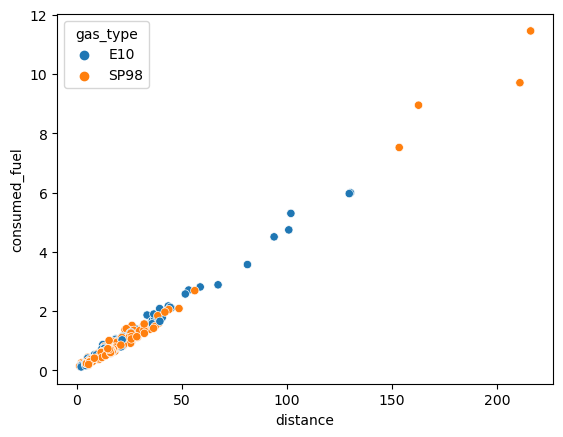

In [34]:
sns.scatterplot(data=df, x='distance', y='consumed_fuel', hue='gas_type')

C:\Users\Benia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

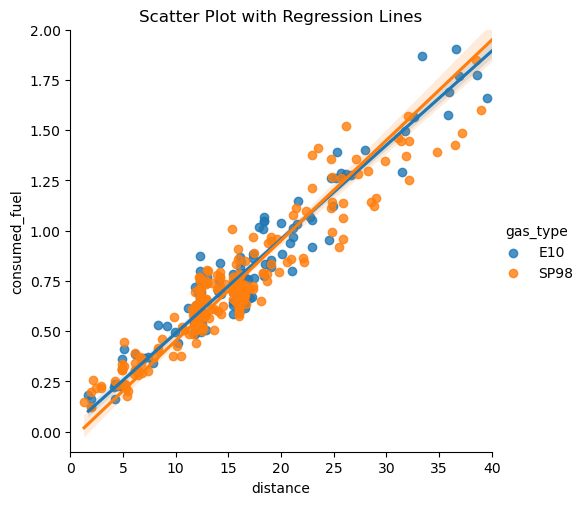

In [82]:
plt.figure(figsize=(8, 6)) 
sns.lmplot(data=df, x='distance', y='consumed_fuel', hue='gas_type')
plt.title('Scatter Plot with Regression Lines')
plt.xlim(0,40)
plt.ylim(-0.1,2)
plt.show()

 - there is no substantial difference between consumtion of SP98 and ED10 at different distances

**Consumed fuel as a function of average speed**

<Axes: xlabel='speed', ylabel='consumed_fuel'>

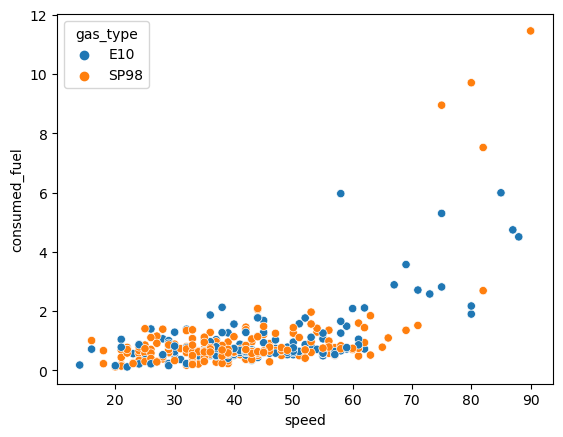

In [35]:
sns.scatterplot(data=df, x='speed', y='consumed_fuel', hue='gas_type')

In [85]:
df.groupby('gas_type')[['distance', 'speed', 'consumed_fuel']].agg(['mean', 'median', 'std']).T

gas_type                    E10       SP98
distance      mean    21.096250  18.639912
              median  15.400000  14.150000
              std     20.307234  24.179598
speed         mean    43.506250  40.820175
              median  42.000000  39.500000
              std     14.077949  13.170122
consumed_fuel mean     1.008933   0.883618
              median   0.693700   0.663200
              std      0.956864   1.214646

**Temperature**

In [89]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'consumed_fuel'],
      dtype='object')

In [99]:
get_dummies = pd.get_dummies(df['gas_type']).astype(int)

In [101]:
df_new = pd.concat([df, get_dummies], axis=1)

In [104]:
df_new.head(4)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,consumed_fuel,E10,SP98
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,1.4000,1,0
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,0.5040,1,0
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,0.6160,1,0
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,0.5031,1,0


In [105]:
numerical = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside','AC', 'rain', 'sun', 'consumed_fuel', 'E10', 'SP98']

In [106]:
corr_matrix = df_new[numerical].corr()

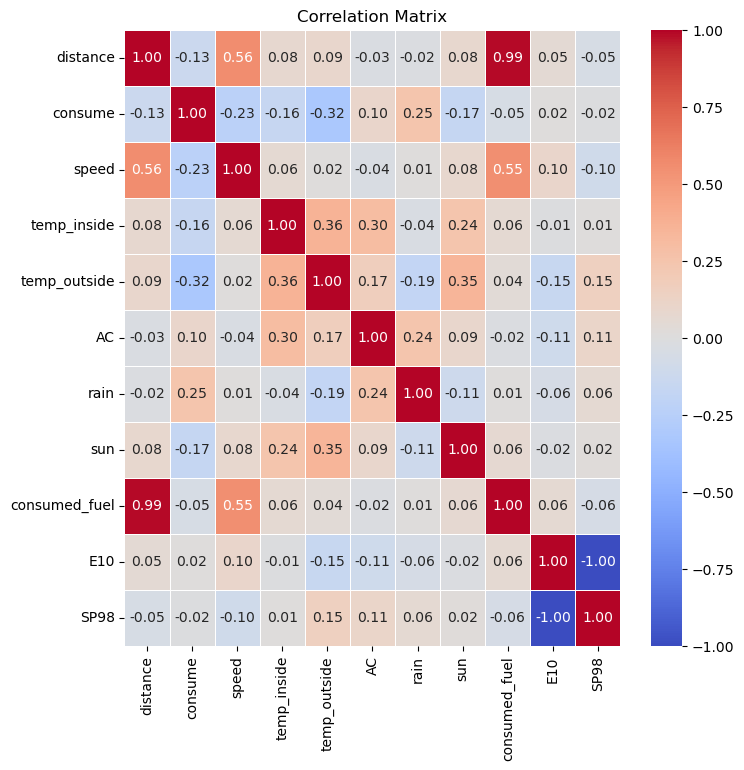

In [108]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()